# Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

sns.set_theme(style="whitegrid")

# Загружаем датает

In [2]:
try:
    df = pd.read_excel(
    'C:\\Users\\a.vechkanov\\Desktop\\Госты, Литература\\Остальное\\Data analitics\\Тестовые\\Тестовое УБРИР\\1.xlsx',
        sheet_name='Sheet1'
    )
    
except:
    df = pd.read_excel(
    'C:\\Users\\Александр\\OneDrive\\Рабочий стол\\Python\\ЯндексПрактикум\\Тестовые\\Тестовое УБРИР\\1.xlsx',
        sheet_name='Sheet1'
    )
    

In [3]:
df.head()

Деловой партнер (Анкета)         Тип      Месяц  Срок кредита (месяце  \
0                         1    Входящие 2019-05-01                    84   
1                         2    Лояльный 2019-08-01                    84   
2                         3    Лояльный 2019-03-01                    24   
3                         4  Зарплатный 2019-01-01                    36   
4                         5  Зарплатный 2019-12-01                    36   

   Процентная ставка  Сумма переплаты  Выдан кредит  Сумма кредита, руб  \
0               16.9     1.067635e+06             1           1500000.0   
1               18.5     7.902012e+05             1           1000000.0   
2               16.5     2.640504e+04             1            146000.0   
3               13.5     2.790830e+04             1            125900.0   
4               12.0     6.850030e+04             1            350000.0   

   Коробки(кол-во)  Коробки(премия)  
0              1.0          13500.0  
1              1.0          28800.0  
2              1.0           6000.0  
3              NaN              NaN  
4              NaN              NaN

In [4]:
df = df.rename(columns={
    'Ид заявки':'Ид_заявки',
    'Дата заявки':'Дата_заявки', 
    'Канал оформления':'Канал_оформления',
    'Статус по заявке':'Статус_по_заявке', 
    'Причина отказа':'Причина_отказа', 
    'Возраст клиента':'Возраст_клиента',
    'Пол клиента':'Пол_клиента'
    
}) 

# Проверяем данные

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51346 entries, 0 to 51345
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Деловой партнер (Анкета)  51346 non-null  int64         
 1   Тип                       51346 non-null  object        
 2   Месяц                     51346 non-null  datetime64[ns]
 3   Срок кредита (месяце      51346 non-null  int64         
 4   Процентная ставка         51346 non-null  float64       
 5   Сумма переплаты           51346 non-null  float64       
 6   Выдан кредит              51346 non-null  int64         
 7   Сумма кредита, руб        51346 non-null  float64       
 8   Коробки(кол-во)           34881 non-null  float64       
 9   Коробки(премия)           34881 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 3.9+ MB


In [6]:
display(df['Деловой партнер (Анкета)'].duplicated().sum())
display(df['Тип'].unique())
display(df['Месяц'].min())
display(df['Месяц'].max())
display(df['Коробки(кол-во)'].unique())

0

array(['Входящие', 'Лояльный', 'Зарплатный', 'Рефинансирование',
       'Прочие кредиты'], dtype=object)

Timestamp('2019-01-01 00:00:00')

Timestamp('2019-12-01 00:00:00')

array([ 1., nan,  0.,  2.])

<div class='alert alert-success'>
    
**Вывод**
<br>Видим анкеты все уникальны(значит это их id)<br> 
<br>Типы: Входящие, Лояльный, Зарплатный, Рефинансирование,Прочие кредиты<br>
<br>Данные взяты за период с 01.01.2019 по 01.12.2019 (привязка к месяцам)<br> 
<br>Коробки: 0, 1, 2, пусто<br>


In [7]:
df.describe()

Деловой партнер (Анкета)  Срок кредита (месяце  Процентная ставка  \
count              51346.000000          51346.000000       51346.000000   
mean               27431.811806             63.142192          19.252789   
std                16130.933154             20.778986           4.736741   
min                    1.000000              3.000000           8.500000   
25%                13410.250000             36.000000          16.500000   
50%                27133.000000             60.000000          18.500000   
75%                41573.750000             84.000000          21.000000   
max                56166.000000            240.000000          62.000000   

       Сумма переплаты  Выдан кредит  Сумма кредита, руб  Коробки(кол-во)  \
count     5.134600e+04       51346.0        5.134600e+04     34881.000000   
mean      2.464624e+05           1.0        4.047165e+05         0.999197   
std       2.645743e+05           0.0        5.772917e+05         0.029316   
min       1.099813e+03           1.0        8.029930e+03         0.000000   
25%       7.045717e+04           1.0        1.448416e+05         1.000000   
50%       1.659859e+05           1.0        2.758358e+05         1.000000   
75%       3.330265e+05           1.0        5.468202e+05         1.000000   
max       2.294233e+07           1.0        2.299618e+07         2.000000   

       Коробки(премия)  
count     34881.000000  
mean      30022.930765  
std       20157.713649  
min           0.000000  
25%       15000.000000  
50%       25500.000000  
75%       40500.000000  
max      178097.000000

<div class='alert alert-success'>
    
**Вывод**
<br>Срок кредита от 3 до 240 месяцев<br> 
<br>Процентная ставка от 8,5 до 62 месяцев<br> 
<br>Сумма переплат от 1099 до 22942330 у.е<br>
<br>Сумма кредита от 8029 до 2299610 у.е<br>
<br>Коробки от 0 до 178097 у.е<br>
<br>**Данные готовы к исследованию.**<br> 
 

# Исследование

## Проанализируем динамику выдачи кредитов

In [8]:
fig = go.Figure(data=[go.Bar(
            x = df.groupby('Месяц')['Деловой партнер (Анкета)'].count().index,
            y = df.groupby('Месяц')['Деловой партнер (Анкета)'].count(),
            text = df.groupby('Месяц')['Деловой партнер (Анкета)'].count(),
            textposition='auto'
)
                     ])

fig.update_layout(
    title = 'Динамика выдачи кол-ва кредитов'     
                 )
fig.show()

fig = go.Figure(data=[go.Bar(
            x = df.groupby('Месяц')['Сумма кредита, руб'].sum().index,
            y = df.groupby('Месяц')['Сумма кредита, руб'].sum(),
            text = round(df.groupby('Месяц')['Сумма кредита, руб'].sum(), 1),
            textposition='auto'
)
                     ])

fig.update_layout(
    title = 'Динамика выдачи суммы кредитов'     
                 )
fig.show()

fig = go.Figure(data=[go.Bar(
            x = df.groupby('Месяц')['Сумма переплаты'].sum().index,
            y = df.groupby('Месяц')['Сумма переплаты'].sum(),
            text = round(df.groupby('Месяц')['Сумма переплаты'].sum(), 1),
            textposition='auto'
)
                     ])

fig.update_layout(
    title = 'Динамика доходов по кредитам'     
                 )
fig.show()

fig = go.Figure(data=[go.Bar(
            x = df.groupby('Месяц')['Процентная ставка'].mean().index,
            y = df.groupby('Месяц')['Процентная ставка'].mean(),
            text = round(df.groupby('Месяц')['Процентная ставка'].mean(), 1),
            textposition='auto'
)
                     ])

fig.update_layout(
    title = 'Динамика средней процентной ставки'     
                 )
fig.show()

fig = go.Figure(data=[go.Bar(
            x = df.groupby('Месяц')['Срок кредита (месяце'].mean().index,
            y = df.groupby('Месяц')['Срок кредита (месяце'].mean(),
            text = round(df.groupby('Месяц')['Срок кредита (месяце'].mean(), 1),
            textposition='auto'
)
                     ])

fig.update_layout(
    title = 'Средний срок кредитования'     
                 )
fig.show()

<div class='alert alert-success'>
    
**Вывод**
<br>Проанализировав выачу кредитов за 2019 год, видно прямую зависимость общей суммы и доходов от количества кредитов.<br>
<br>За год у нас три месяца, когда количество выданых кредитов было меньше чем в предыдущем месяце - это май, июнь, сентябрь.<br>
<br>Чем ниже ставка, тем больше выдаем кредитов.<br>

## Проанализируем доходность кредитов  в разрезе по типам

In [9]:
fig = go.Figure()
fig.add_trace(go.Pie(labels = df.groupby('Тип')['Сумма переплаты'].sum().index,
                        values = df.groupby('Тип')['Сумма переплаты'].sum(), 
                        textinfo = 'label+percent+value'
                        ))

fig.update_layout(
            title = '2019 год'
        )

fig.show()

## Посмотрим доходность кредитов по типам

In [10]:
for i in df['Тип'].unique():
    fig = go.Figure()
    fig.add_trace(go.Bar(x=df.query('Тип == @i').groupby('Месяц')['Сумма переплаты'].sum().index,
                    y=df.query('Тип == @i').groupby('Месяц')['Сумма переплаты'].sum(), 
                    text = round(df.query('Тип == @i').groupby('Месяц')['Сумма переплаты'].sum(), 1),
                    textposition='auto'
                    ))


    fig.update_layout(
        title=i,
    )
    fig.show()

## Рассмотрим изменение доходов по типам кредитов в течении года

In [11]:
b = df.pivot_table(index='Месяц', columns='Тип', values='Сумма переплаты', aggfunc='sum')
b

Тип             Входящие    Зарплатный      Лояльный  Прочие кредиты  \
Месяц                                                                  
2019-01-01  1.914336e+08  1.365047e+08  1.016268e+08    5.524352e+06   
2019-02-01  2.427884e+08  1.515913e+08  1.619475e+08    1.931431e+07   
2019-03-01  3.238686e+08  1.387079e+08  3.117330e+08    1.106768e+07   
2019-04-01  4.113142e+08  1.721873e+08  3.292404e+08    2.969836e+07   
2019-05-01  3.451091e+08  1.619902e+08  2.961321e+08    3.992248e+06   
2019-06-01  2.615346e+08  1.365290e+08  3.283152e+08    4.794853e+06   
2019-07-01  5.158829e+08  1.502107e+08  2.970398e+08    8.281873e+06   
2019-08-01  5.382192e+08  1.634188e+08  3.049045e+08    2.743817e+06   
2019-09-01  5.321763e+08  1.276497e+08  1.904533e+08    4.450165e+06   
2019-10-01  6.617008e+08  1.407397e+08  1.310370e+08    2.868455e+06   
2019-11-01  6.062653e+08  1.214270e+08  1.371205e+08    2.864521e+06   
2019-12-01  6.815947e+08  1.194698e+08  1.886062e+08    7.801542e+06   

Тип         Рефинансирование  
Месяц                         
2019-01-01      4.859182e+07  
2019-02-01      7.336315e+07  
2019-03-01      1.031400e+08  
2019-04-01      1.414251e+08  
2019-05-01      1.305980e+08  
2019-06-01      1.198393e+08  
2019-07-01      1.473132e+08  
2019-08-01      1.692764e+08  
2019-09-01      1.433687e+08  
2019-10-01      3.495566e+08  
2019-11-01      6.768913e+08  
2019-12-01      6.376199e+08

In [12]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=b.index, y=b['Входящие'],
                    mode='lines',
                    name='Входящие'))

fig.add_trace(go.Scatter(x=b.index, y=b['Зарплатный'],
                    mode='lines',
                    name='Зарплатный'))

fig.add_trace(go.Scatter(x=b.index, y=b['Лояльный'],
                    mode='lines', name='Лояльный'))

fig.add_trace(go.Scatter(x=b.index, y=b['Прочие кредиты'],
                    mode='lines',
                    name='Прочие кредиты'))

fig.add_trace(go.Scatter(x=b.index, y=b['Рефинансирование'],
                    mode='lines',
                    name='Рефинансирование'))

fig.show()

## Посмотрим процент доходов по типам кредита от дохода в месяц 

In [13]:
c = b.T.apply(lambda x: round(100*x/float(x.sum()), 1)).T
c

Тип         Входящие  Зарплатный  Лояльный  Прочие кредиты  Рефинансирование
Месяц                                                                       
2019-01-01      39.6        28.2      21.0             1.1              10.0
2019-02-01      37.4        23.4      25.0             3.0              11.3
2019-03-01      36.5        15.6      35.1             1.2              11.6
2019-04-01      37.9        15.9      30.4             2.7              13.0
2019-05-01      36.8        17.3      31.6             0.4              13.9
2019-06-01      30.7        16.0      38.6             0.6              14.1
2019-07-01      46.1        13.4      26.6             0.7              13.2
2019-08-01      45.7        13.9      25.9             0.2              14.4
2019-09-01      53.3        12.8      19.1             0.4              14.4
2019-10-01      51.5        10.9      10.2             0.2              27.2
2019-11-01      39.3         7.9       8.9             0.2              43.8
2019-12-01      41.7         7.3      11.5             0.5              39.0

## Рассмотрим корреляцию наших данных

In [14]:
def category(row):
    # определение переменных
    age = row['Тип']

    # условия для категоризации 
    if  age == "Входящие":
        return 1
 
    elif age == "Лояльный":
        return 2  
 
    elif age == "Зарплатный":
        return 3
    
    elif age == "Рефинансирование":
        return 4
    
    elif age == "Прочие кредиты":
        return 5
 
df['Тип номер'] = df.apply(category, axis=1)
df.head()

Деловой партнер (Анкета)         Тип      Месяц  Срок кредита (месяце  \
0                         1    Входящие 2019-05-01                    84   
1                         2    Лояльный 2019-08-01                    84   
2                         3    Лояльный 2019-03-01                    24   
3                         4  Зарплатный 2019-01-01                    36   
4                         5  Зарплатный 2019-12-01                    36   

   Процентная ставка  Сумма переплаты  Выдан кредит  Сумма кредита, руб  \
0               16.9     1.067635e+06             1           1500000.0   
1               18.5     7.902012e+05             1           1000000.0   
2               16.5     2.640504e+04             1            146000.0   
3               13.5     2.790830e+04             1            125900.0   
4               12.0     6.850030e+04             1            350000.0   

   Коробки(кол-во)  Коробки(премия)  Тип номер  
0              1.0          13500.0          1  
1              1.0          28800.0          2  
2              1.0           6000.0          2  
3              NaN              NaN          3  
4              NaN              NaN          3

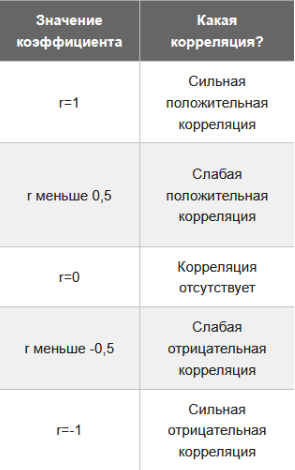

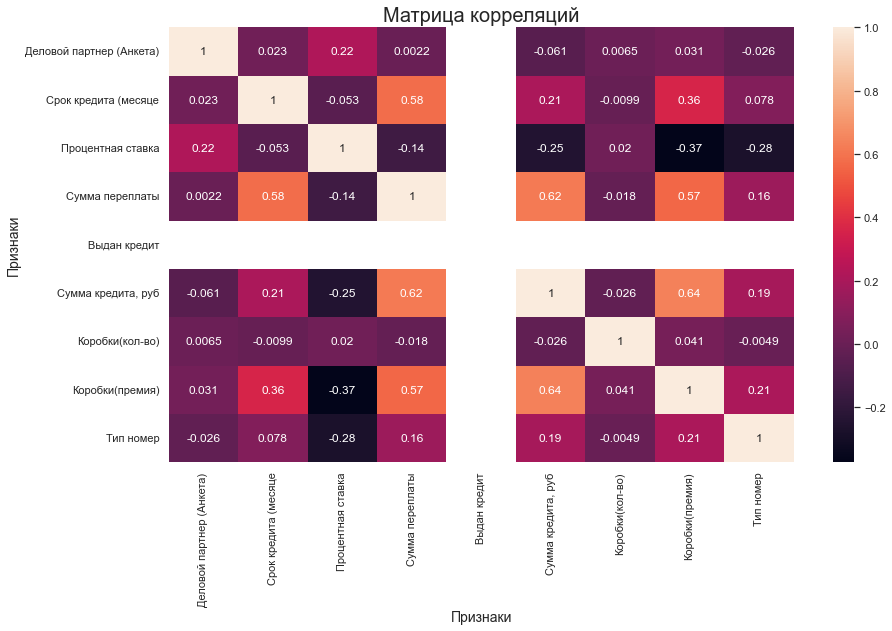

In [15]:
matr = df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(matr, annot = True, square=False)
plt.title('Матрица корреляций', fontsize = 20)
plt.xlabel('Признаки', fontsize = 14)
plt.ylabel('Признаки', fontsize = 14)
plt.show()

<div class='alert alert-success'>
    <br>Видим корреляцию срока кредита и переплаты 0.58 ( что логично для нас )<br>
    <br>Видим корреляцию сумма кредита и переплаты 0.62 ( тоже логично )<br>
    <br>Видим корреляцию срока кредита и коробки( премия ) 0.36 <br>
    <br>Видим отриц. корреляцию процентная ставка и коробки( премия ) -0.37 <br>
    <br>Видим отриц. корреляцию процентная ставка и тип номер -0.28 <br>
    

## Вывод
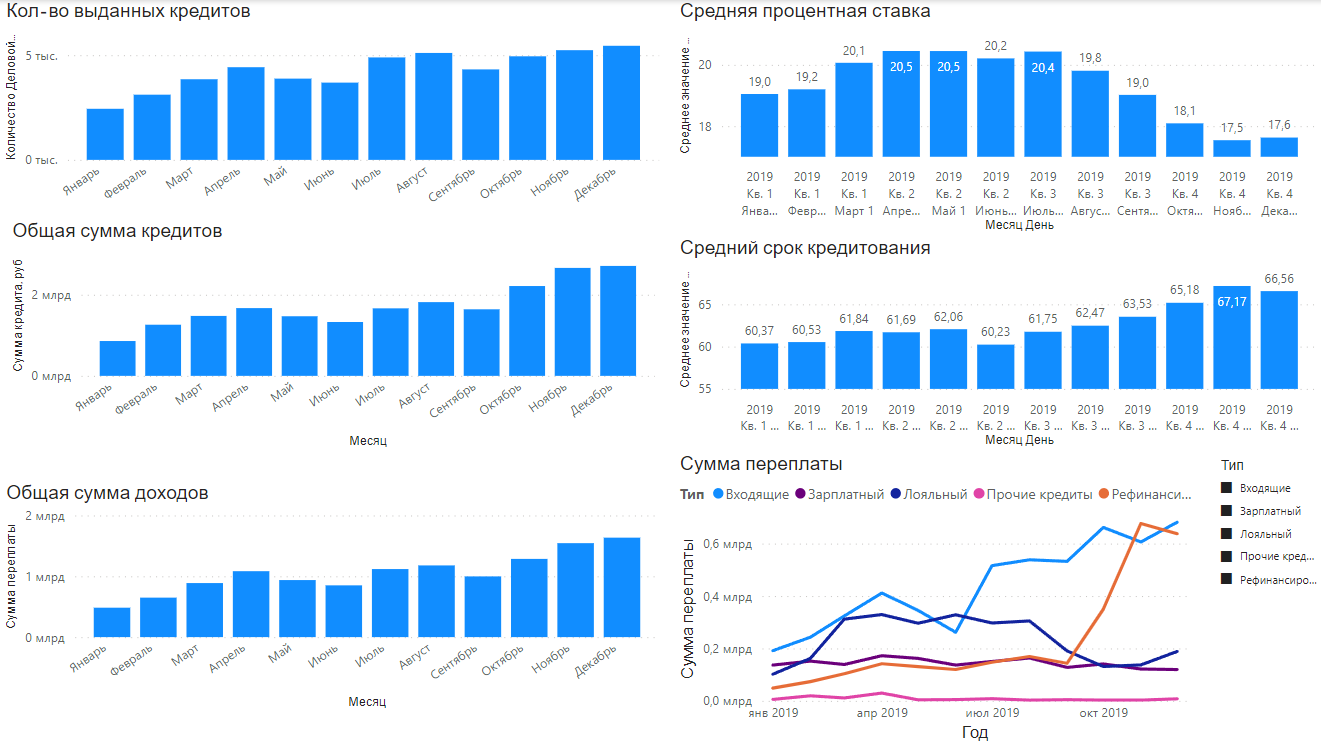
<div class='alert alert-success'>
    <br>На графиках видно, что от количества выданных кредитов зависит и доход. Была вероятность, что в какой то месяц выдадут кредитов меньше, но на бОльшую сумму, соответственно и бОльшую переплату, но она не подтвердилась.<br>
    <br>Так же наблюдается тенденция при повышении процетной ставки с января по апрель, увеличивалось и кол-во выданных кредитов и средний срок кредитования.<br>
    <br>В мае и июне наблюдаем спад выдачи кредитов, он связан со снижением доходов с входящих типов кредитов, вохможно так отреагировали клиенты на стогнацию кредитной ставки в мае и ее снижении на 0,3 в июне.<br>
    <br>Повышении кредитной ставки в июле нам снова дало рост входящих типов кредитов (почти в два раза).<br>
    <br>Далее с августа по декабрь ставка постепенно снижалась. В общей сложности они снизилась на 3 процента, что сподвигнуло клиентов рефенансирвоать свои кредиты, еу так же есть незначительный рост и у входящих типов кредитов.<br>
   

## Лояльный тип кредитов 
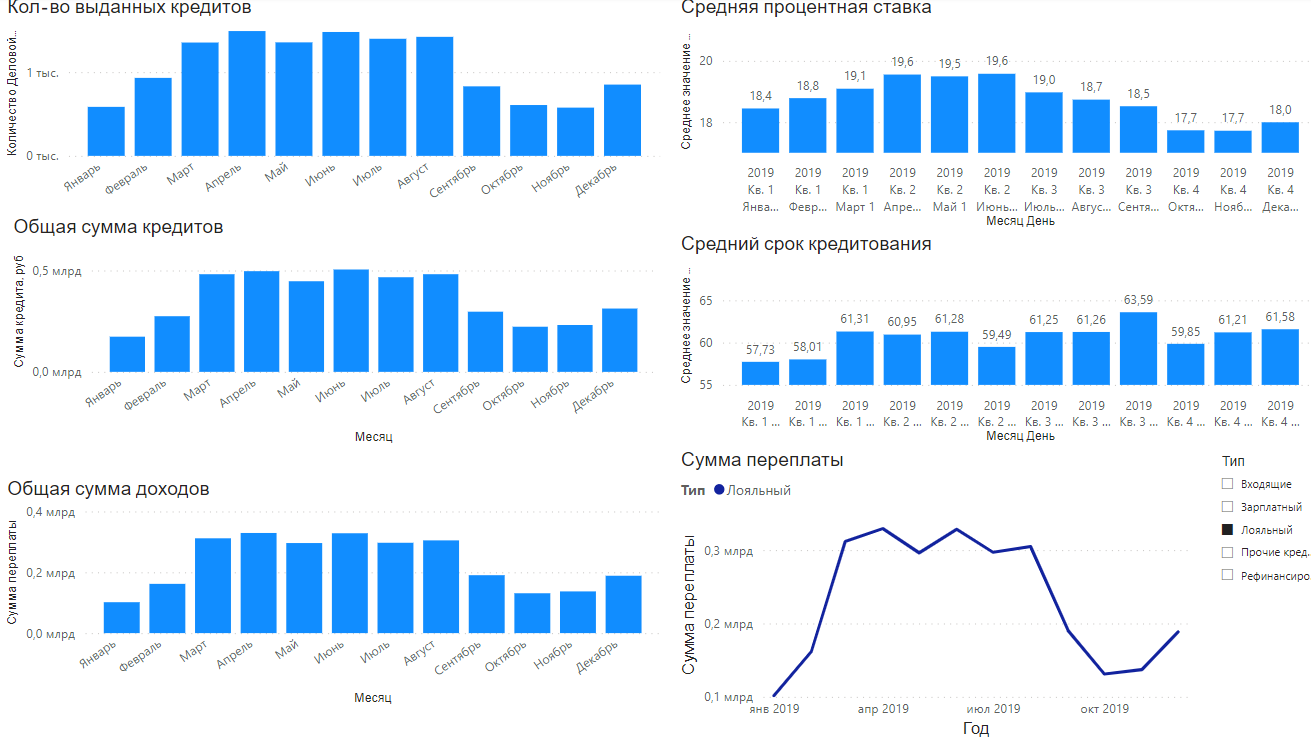
<div class='alert alert-success'>
    Лояльные типы кредитов зависят от процентной ставки, чем выше ставка, тем тем больше кредитов таких типов выдается.

## Рефенансирование 
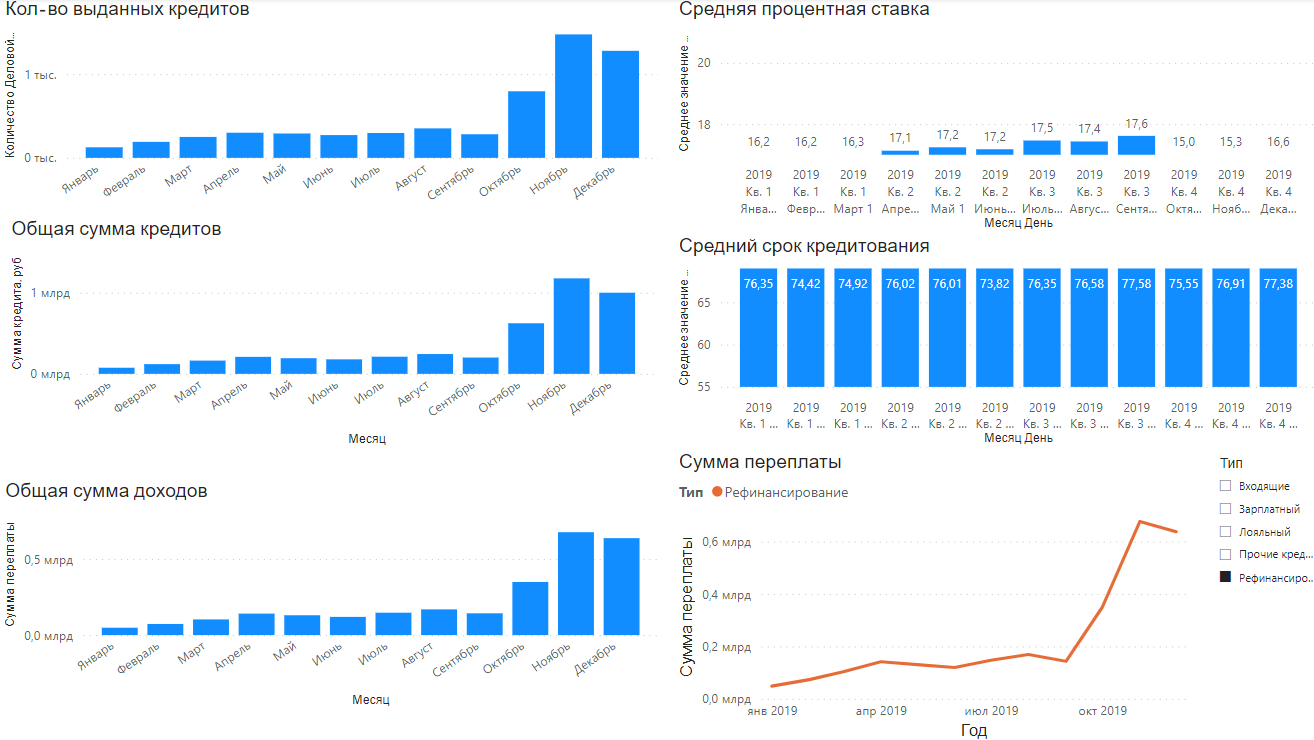
<div class='alert alert-success'>
    У рефенансирования обратная логика, чем меньше ставка, тем чаще клиенты прибегают к такому типу кредита(перекредитации).

## Входящий тип кредитов
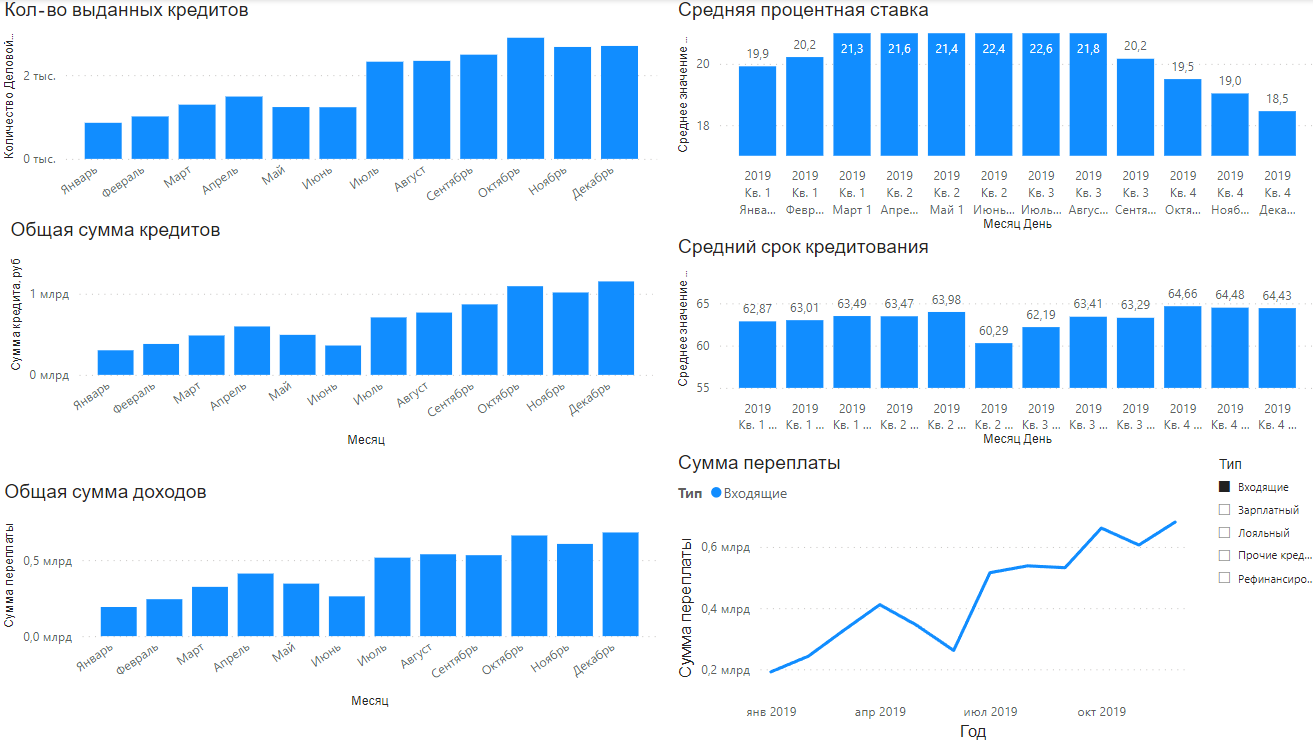
<div class='alert alert-success'>
    Входящий тип кредитов охотней для клиентов если низкая процентная ставка

## Зарплатный тип кредитов
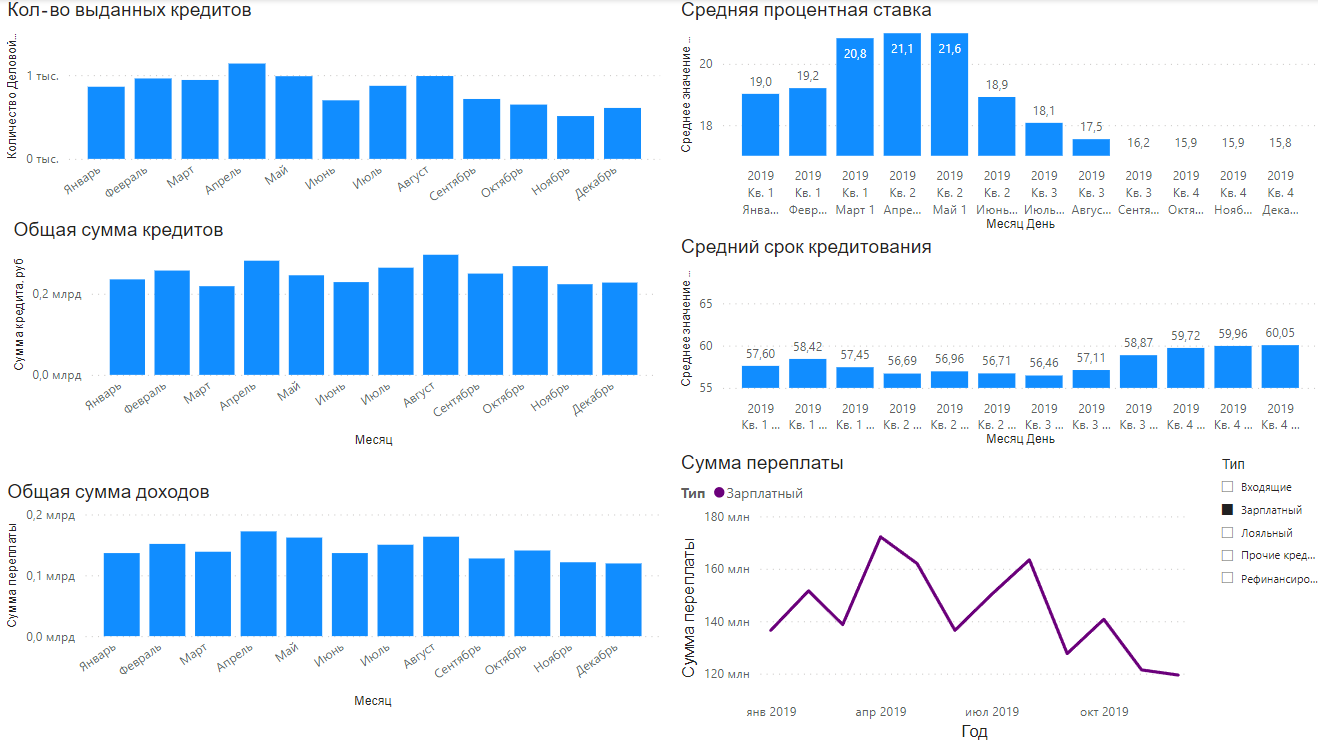
<div class='alert alert-success'>
    Зарплатный тип кредитов больше берут на высокой процентной ставки. 

## Прочие кредиты
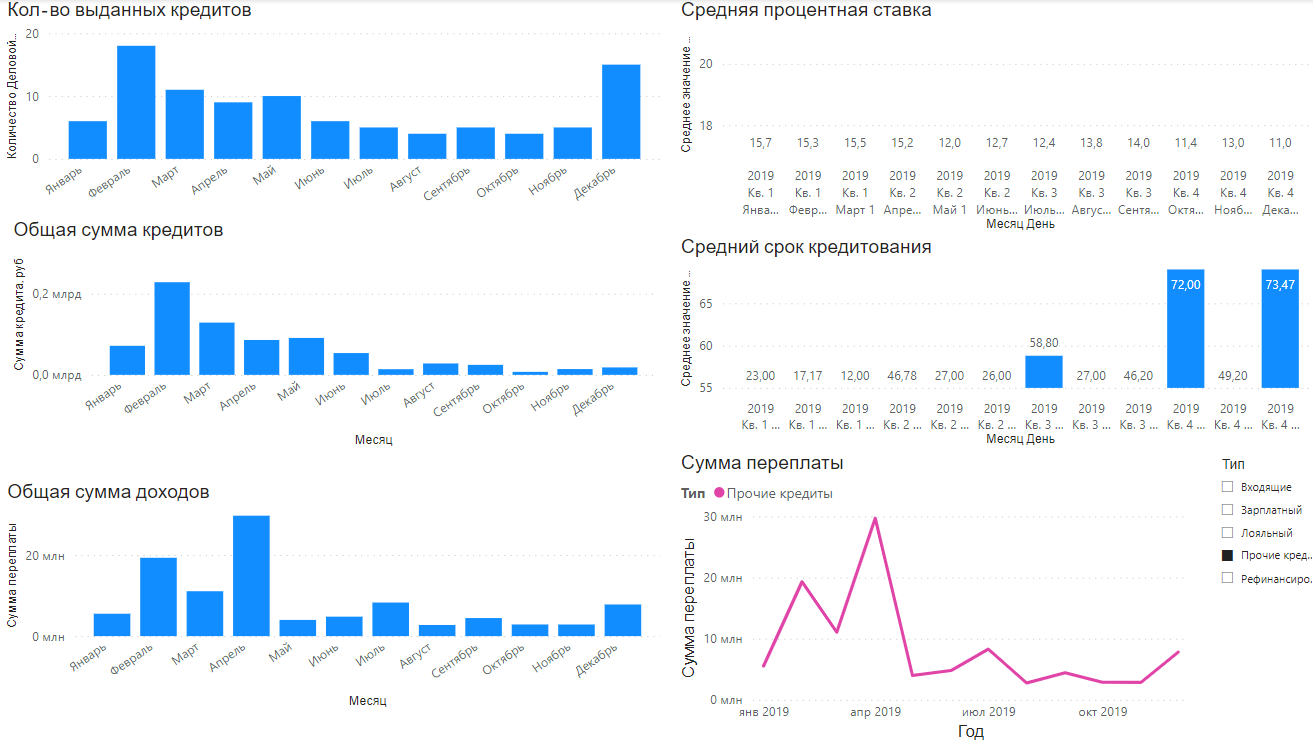
<div class='alert alert-success'>
У прочих типов кредитов сложно найти какую либо закономернность по данной выборке.

## Общая картина по доходам
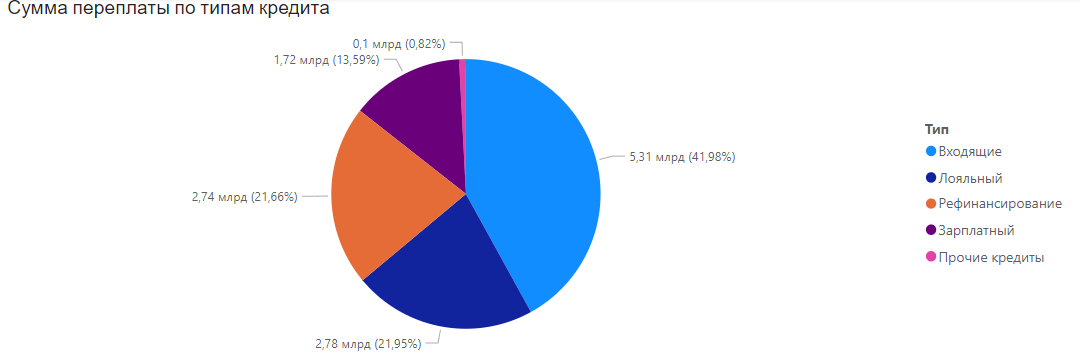
<div class='alert alert-success'>
    <br>Самый доходный тип кредитования для нас является входящий тип кредитов, далее идет лояльный тип кредитов и рефенансирование ( по 20% ), ну и 13.5 процентов это зарплатный тип кредитов.<br\> 

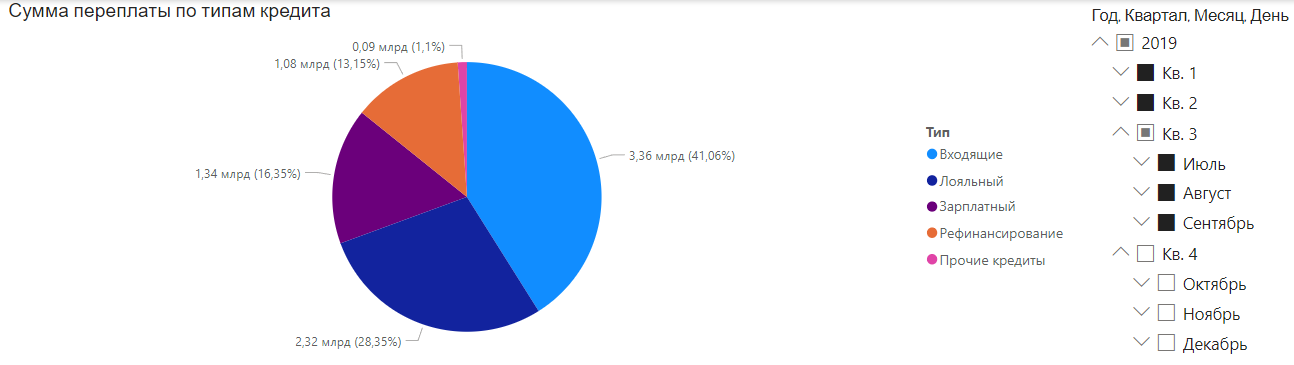
<div class='alert alert-success'>
    <br>Но выяснилсь что такой расклад мы получили только в 4ом квартале. До этого лидерами доходов были входящий и лояльный тип кредитов 28 и 41 % соответственно. Зарпланый 16 и рефенансирование 13. 

## Продукт для запуска пилота
    Мы видим, тип кредитов рефенансирование, зарплатный и входящий зависят от процентной ставки, прочие кредиты имеют небольшой процент в наших общих доходах. 
    ЛОЯЛЬНЫЙ ТИП кредита, тут мы наблюдаем средний доход за 6 месяцев март-август в районе 0,3 млрд. руб. это примерно 1,8 млрд.руб в сумме. За январь, ферваль, сентябрь-декабрь ма заработали 1 млрд. руб. это почти в два раза меньше.
    
    Нужно страться исправить ситуацию именно в этом типе кредитования. Необходимо выдавать 1300 - 1500 кредитов в месяц. Конечно лояльный тип кредита тоже коррелирует с проентной ставкой, поэтому необходимо ее держать на уровне 19 - 19,5 %. 
    
    Главные целевые показатели пилота: ровный доход в течении года по лояльному типу кредита, в районе 3,6 млрд. руб +- 5% за календарный год.
   